In [112]:
#-*- coding: utf-8 -*-
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint,EarlyStopping
from sklearn.model_selection import train_test_split

import numpy
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os

# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

In [129]:
# 데이터 로드
df = pd.read_csv("../dataset/housing.csv", delim_whitespace=True, header=None)
dataset = df.values
dataset.shape

(506, 14)

In [130]:
# 데이터 분리
X = dataset[:, 0:13]
Y = dataset[:, 13]

# train, test 데이터 분리
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=seed)

In [131]:
# 딥러닝 모델 선언
model = Sequential()
model.add(Dense(30, input_dim=13, activation='relu'))  # 입력층
                                                       # 은닉층1
model.add(Dense(25, activation='relu'))    
model.add(Dense(15, activation='relu'))            
model.add(Dense(6, activation='relu'))                 # 
model.add(Dense(1))                                    # 출력층
# 선형 회귀는 마지막에 참과 거짓을 구분할 필요가 없음. 출력층에 활성화 함수를 지정할 필요도 없음

model.compile(loss='mean_squared_error',
              optimizer='adam', 
              metrics=['mse'])

In [132]:
# 모델 저장 폴더 만들기
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath = "./model/{epoch:02d}-{val_loss:.4f}.hdf5"

# 모델 업데이트 및 저장
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_mse', verbose=1, save_best_only=True)

# 학습 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_mse', patience=100)

In [133]:
# 모델 학습
history = model.fit(X_train, Y_train, validation_split=0.33, epochs=5000, batch_size=30, verbose=1, callbacks=[early_stopping_callback, checkpointer])

Epoch 1/5000
1/8 [==>...........................] - ETA: 0s - loss: 195.7872 - mse: 195.7872
Epoch 00001: val_mse improved from inf to 97.15369, saving model to ./model/01-97.1537.hdf5
8/8 [==============================] - 0s 14ms/step - loss: 104.1232 - mse: 104.1232 - val_loss: 97.1537 - val_mse: 97.1537
Epoch 2/5000
1/8 [==>...........................] - ETA: 0s - loss: 128.4623 - mse: 128.4623
Epoch 00002: val_mse improved from 97.15369 to 83.70543, saving model to ./model/02-83.7054.hdf5
8/8 [==============================] - 0s 5ms/step - loss: 71.5013 - mse: 71.5013 - val_loss: 83.7054 - val_mse: 83.7054
Epoch 3/5000
1/8 [==>...........................] - ETA: 0s - loss: 55.1438 - mse: 55.1438
Epoch 00003: val_mse improved from 83.70543 to 74.23959, saving model to ./model/03-74.2396.hdf5
8/8 [==============================] - 0s 6ms/step - loss: 72.4464 - mse: 72.4464 - val_loss: 74.2396 - val_mse: 74.2396
Epoch 4/5000
1/8 [==>...........................] - ETA: 0s - loss: 85.

Epoch 29/5000
1/8 [==>...........................] - ETA: 0s - loss: 29.6856 - mse: 29.6856
Epoch 00029: val_mse did not improve from 53.11743
8/8 [==============================] - 0s 2ms/step - loss: 49.2259 - mse: 49.2259 - val_loss: 53.9309 - val_mse: 53.9309
Epoch 30/5000
1/8 [==>...........................] - ETA: 0s - loss: 47.0658 - mse: 47.0658
Epoch 00030: val_mse improved from 53.11743 to 52.16995, saving model to ./model/30-52.1700.hdf5
8/8 [==============================] - 0s 6ms/step - loss: 48.3040 - mse: 48.3040 - val_loss: 52.1700 - val_mse: 52.1700
Epoch 31/5000
1/8 [==>...........................] - ETA: 0s - loss: 54.9542 - mse: 54.9542
Epoch 00031: val_mse improved from 52.16995 to 51.72659, saving model to ./model/31-51.7266.hdf5
8/8 [==============================] - 0s 6ms/step - loss: 48.2122 - mse: 48.2122 - val_loss: 51.7266 - val_mse: 51.7266
Epoch 32/5000
1/8 [==>...........................] - ETA: 0s - loss: 44.2684 - mse: 44.2684
Epoch 00032: val_mse did

8/8 [==============================] - 0s 6ms/step - loss: 44.8648 - mse: 44.8648 - val_loss: 42.7193 - val_mse: 42.7193
Epoch 58/5000
1/8 [==>...........................] - ETA: 0s - loss: 76.0182 - mse: 76.0182
Epoch 00058: val_mse did not improve from 42.71935
8/8 [==============================] - 0s 3ms/step - loss: 42.6334 - mse: 42.6334 - val_loss: 47.5655 - val_mse: 47.5655
Epoch 59/5000
1/8 [==>...........................] - ETA: 0s - loss: 21.9757 - mse: 21.9757
Epoch 00059: val_mse did not improve from 42.71935
8/8 [==============================] - 0s 3ms/step - loss: 40.0548 - mse: 40.0548 - val_loss: 49.0849 - val_mse: 49.0849
Epoch 60/5000
1/8 [==>...........................] - ETA: 0s - loss: 48.6586 - mse: 48.6586
Epoch 00060: val_mse improved from 42.71935 to 42.06163, saving model to ./model/60-42.0616.hdf5
8/8 [==============================] - 0s 6ms/step - loss: 38.1021 - mse: 38.1021 - val_loss: 42.0616 - val_mse: 42.0616
Epoch 61/5000
1/8 [==>...................

Epoch 87/5000
1/8 [==>...........................] - ETA: 0s - loss: 15.8738 - mse: 15.8738
Epoch 00087: val_mse did not improve from 36.95068
8/8 [==============================] - 0s 3ms/step - loss: 28.9469 - mse: 28.9469 - val_loss: 38.2579 - val_mse: 38.2579
Epoch 88/5000
1/8 [==>...........................] - ETA: 0s - loss: 33.8562 - mse: 33.8562
Epoch 00088: val_mse did not improve from 36.95068
8/8 [==============================] - 0s 3ms/step - loss: 28.7250 - mse: 28.7250 - val_loss: 37.0510 - val_mse: 37.0510
Epoch 89/5000
1/8 [==>...........................] - ETA: 0s - loss: 38.6986 - mse: 38.6986
Epoch 00089: val_mse improved from 36.95068 to 35.91000, saving model to ./model/89-35.9100.hdf5
8/8 [==============================] - 0s 6ms/step - loss: 29.4840 - mse: 29.4840 - val_loss: 35.9100 - val_mse: 35.9100
Epoch 90/5000
1/8 [==>...........................] - ETA: 0s - loss: 21.4455 - mse: 21.4455
Epoch 00090: val_mse did not improve from 35.91000
8/8 [==============

Epoch 117/5000
1/8 [==>...........................] - ETA: 0s - loss: 24.2740 - mse: 24.2740
Epoch 00117: val_mse did not improve from 33.93381
8/8 [==============================] - 0s 3ms/step - loss: 24.9468 - mse: 24.9468 - val_loss: 35.2689 - val_mse: 35.2689
Epoch 118/5000
1/8 [==>...........................] - ETA: 0s - loss: 19.8109 - mse: 19.8109
Epoch 00118: val_mse did not improve from 33.93381
8/8 [==============================] - 0s 3ms/step - loss: 25.8141 - mse: 25.8141 - val_loss: 36.5477 - val_mse: 36.5477
Epoch 119/5000
1/8 [==>...........................] - ETA: 0s - loss: 19.1032 - mse: 19.1032
Epoch 00119: val_mse improved from 33.93381 to 33.76304, saving model to ./model/119-33.7630.hdf5
8/8 [==============================] - 0s 6ms/step - loss: 26.7374 - mse: 26.7374 - val_loss: 33.7630 - val_mse: 33.7630
Epoch 120/5000
1/8 [==>...........................] - ETA: 0s - loss: 65.1730 - mse: 65.1730
Epoch 00120: val_mse did not improve from 33.76304
8/8 [=========

Epoch 147/5000
1/8 [==>...........................] - ETA: 0s - loss: 30.9626 - mse: 30.9626
Epoch 00147: val_mse did not improve from 31.08545
8/8 [==============================] - 0s 3ms/step - loss: 26.3100 - mse: 26.3100 - val_loss: 39.1069 - val_mse: 39.1069
Epoch 148/5000
1/8 [==>...........................] - ETA: 0s - loss: 20.8163 - mse: 20.8163
Epoch 00148: val_mse did not improve from 31.08545
8/8 [==============================] - 0s 3ms/step - loss: 25.5708 - mse: 25.5708 - val_loss: 32.0055 - val_mse: 32.0055
Epoch 149/5000
1/8 [==>...........................] - ETA: 0s - loss: 16.0243 - mse: 16.0243
Epoch 00149: val_mse improved from 31.08545 to 30.97035, saving model to ./model/149-30.9704.hdf5
8/8 [==============================] - 0s 6ms/step - loss: 25.3541 - mse: 25.3541 - val_loss: 30.9704 - val_mse: 30.9704
Epoch 150/5000
1/8 [==>...........................] - ETA: 0s - loss: 13.8960 - mse: 13.8960
Epoch 00150: val_mse did not improve from 30.97035
8/8 [=========

1/8 [==>...........................] - ETA: 0s - loss: 29.2836 - mse: 29.2836
Epoch 00177: val_mse did not improve from 28.47627
8/8 [==============================] - 0s 3ms/step - loss: 20.5971 - mse: 20.5971 - val_loss: 30.3827 - val_mse: 30.3827
Epoch 178/5000
1/8 [==>...........................] - ETA: 0s - loss: 12.7695 - mse: 12.7695
Epoch 00178: val_mse did not improve from 28.47627
8/8 [==============================] - 0s 3ms/step - loss: 21.5264 - mse: 21.5264 - val_loss: 31.4091 - val_mse: 31.4091
Epoch 179/5000
1/8 [==>...........................] - ETA: 0s - loss: 9.5264 - mse: 9.5264
Epoch 00179: val_mse did not improve from 28.47627
8/8 [==============================] - 0s 3ms/step - loss: 19.6788 - mse: 19.6788 - val_loss: 31.9301 - val_mse: 31.9301
Epoch 180/5000
1/8 [==>...........................] - ETA: 0s - loss: 15.4860 - mse: 15.4860
Epoch 00180: val_mse improved from 28.47627 to 28.13346, saving model to ./model/180-28.1335.hdf5
8/8 [==========================

Epoch 207/5000
1/8 [==>...........................] - ETA: 0s - loss: 15.6592 - mse: 15.6592
Epoch 00207: val_mse did not improve from 25.58297
8/8 [==============================] - 0s 3ms/step - loss: 18.6496 - mse: 18.6496 - val_loss: 26.0006 - val_mse: 26.0006
Epoch 208/5000
1/8 [==>...........................] - ETA: 0s - loss: 22.6294 - mse: 22.6294
Epoch 00208: val_mse did not improve from 25.58297
8/8 [==============================] - 0s 3ms/step - loss: 18.4307 - mse: 18.4307 - val_loss: 26.1126 - val_mse: 26.1126
Epoch 209/5000
1/8 [==>...........................] - ETA: 0s - loss: 9.8566 - mse: 9.8566
Epoch 00209: val_mse did not improve from 25.58297
8/8 [==============================] - 0s 3ms/step - loss: 17.7070 - mse: 17.7070 - val_loss: 29.0410 - val_mse: 29.0410
Epoch 210/5000
1/8 [==>...........................] - ETA: 0s - loss: 15.9365 - mse: 15.9365
Epoch 00210: val_mse did not improve from 25.58297
8/8 [==============================] - 0s 3ms/step - loss: 16.5

1/8 [==>...........................] - ETA: 0s - loss: 13.2743 - mse: 13.2743
Epoch 00237: val_mse did not improve from 24.60633
8/8 [==============================] - 0s 3ms/step - loss: 18.1328 - mse: 18.1328 - val_loss: 32.2407 - val_mse: 32.2407
Epoch 238/5000
1/8 [==>...........................] - ETA: 0s - loss: 19.1348 - mse: 19.1348
Epoch 00238: val_mse did not improve from 24.60633
8/8 [==============================] - 0s 3ms/step - loss: 18.5497 - mse: 18.5497 - val_loss: 36.5953 - val_mse: 36.5953
Epoch 239/5000
1/8 [==>...........................] - ETA: 0s - loss: 34.3230 - mse: 34.3230
Epoch 00239: val_mse improved from 24.60633 to 24.47086, saving model to ./model/239-24.4709.hdf5
8/8 [==============================] - 0s 6ms/step - loss: 20.0501 - mse: 20.0501 - val_loss: 24.4709 - val_mse: 24.4709
Epoch 240/5000
1/8 [==>...........................] - ETA: 0s - loss: 9.7622 - mse: 9.7622
Epoch 00240: val_mse did not improve from 24.47086
8/8 [==========================

Epoch 267/5000
1/8 [==>...........................] - ETA: 0s - loss: 12.8471 - mse: 12.8471
Epoch 00267: val_mse did not improve from 22.12881
8/8 [==============================] - 0s 3ms/step - loss: 13.6561 - mse: 13.6561 - val_loss: 25.5360 - val_mse: 25.5360
Epoch 268/5000
1/8 [==>...........................] - ETA: 0s - loss: 16.6520 - mse: 16.6520
Epoch 00268: val_mse improved from 22.12881 to 21.86845, saving model to ./model/268-21.8684.hdf5
8/8 [==============================] - 0s 6ms/step - loss: 13.8548 - mse: 13.8548 - val_loss: 21.8684 - val_mse: 21.8684
Epoch 269/5000
1/8 [==>...........................] - ETA: 0s - loss: 12.7389 - mse: 12.7389
Epoch 00269: val_mse did not improve from 21.86845
8/8 [==============================] - 0s 3ms/step - loss: 13.6386 - mse: 13.6386 - val_loss: 23.1611 - val_mse: 23.1611
Epoch 270/5000
1/8 [==>...........................] - ETA: 0s - loss: 10.3257 - mse: 10.3257
Epoch 00270: val_mse did not improve from 21.86845
8/8 [=========

Epoch 298/5000
1/8 [==>...........................] - ETA: 0s - loss: 21.1297 - mse: 21.1297
Epoch 00298: val_mse did not improve from 20.86837
8/8 [==============================] - 0s 3ms/step - loss: 14.5482 - mse: 14.5482 - val_loss: 23.9459 - val_mse: 23.9459
Epoch 299/5000
1/8 [==>...........................] - ETA: 0s - loss: 20.3339 - mse: 20.3339
Epoch 00299: val_mse did not improve from 20.86837
8/8 [==============================] - 0s 3ms/step - loss: 15.0467 - mse: 15.0467 - val_loss: 26.0590 - val_mse: 26.0590
Epoch 300/5000
1/8 [==>...........................] - ETA: 0s - loss: 10.0560 - mse: 10.0560
Epoch 00300: val_mse did not improve from 20.86837
8/8 [==============================] - 0s 3ms/step - loss: 12.9984 - mse: 12.9984 - val_loss: 21.8475 - val_mse: 21.8475
Epoch 301/5000
1/8 [==>...........................] - ETA: 0s - loss: 15.8048 - mse: 15.8048
Epoch 00301: val_mse did not improve from 20.86837
8/8 [==============================] - 0s 3ms/step - loss: 12

Epoch 329/5000
1/8 [==>...........................] - ETA: 0s - loss: 11.0994 - mse: 11.0994
Epoch 00329: val_mse did not improve from 20.61823
8/8 [==============================] - 0s 3ms/step - loss: 11.7649 - mse: 11.7649 - val_loss: 20.9573 - val_mse: 20.9573
Epoch 330/5000
1/8 [==>...........................] - ETA: 0s - loss: 14.1188 - mse: 14.1188
Epoch 00330: val_mse did not improve from 20.61823
8/8 [==============================] - 0s 3ms/step - loss: 12.1439 - mse: 12.1439 - val_loss: 20.9948 - val_mse: 20.9948
Epoch 331/5000
1/8 [==>...........................] - ETA: 0s - loss: 11.4311 - mse: 11.4311
Epoch 00331: val_mse did not improve from 20.61823
8/8 [==============================] - 0s 3ms/step - loss: 11.7919 - mse: 11.7919 - val_loss: 21.6509 - val_mse: 21.6509
Epoch 332/5000
1/8 [==>...........................] - ETA: 0s - loss: 9.4087 - mse: 9.4087
Epoch 00332: val_mse did not improve from 20.61823
8/8 [==============================] - 0s 3ms/step - loss: 11.4

Epoch 360/5000
1/8 [==>...........................] - ETA: 0s - loss: 13.7232 - mse: 13.7232
Epoch 00360: val_mse did not improve from 20.10545
8/8 [==============================] - 0s 3ms/step - loss: 11.9265 - mse: 11.9265 - val_loss: 21.0446 - val_mse: 21.0446
Epoch 361/5000
1/8 [==>...........................] - ETA: 0s - loss: 21.1224 - mse: 21.1224
Epoch 00361: val_mse did not improve from 20.10545
8/8 [==============================] - 0s 3ms/step - loss: 13.2436 - mse: 13.2436 - val_loss: 21.9736 - val_mse: 21.9736
Epoch 362/5000
1/8 [==>...........................] - ETA: 0s - loss: 11.2940 - mse: 11.2940
Epoch 00362: val_mse did not improve from 20.10545
8/8 [==============================] - 0s 3ms/step - loss: 12.6341 - mse: 12.6341 - val_loss: 23.0777 - val_mse: 23.0777
Epoch 363/5000
1/8 [==>...........................] - ETA: 0s - loss: 10.8369 - mse: 10.8369
Epoch 00363: val_mse did not improve from 20.10545
8/8 [==============================] - 0s 3ms/step - loss: 11

1/8 [==>...........................] - ETA: 0s - loss: 12.2722 - mse: 12.2722
Epoch 00391: val_mse did not improve from 20.10545
8/8 [==============================] - 0s 3ms/step - loss: 16.5028 - mse: 16.5028 - val_loss: 21.8929 - val_mse: 21.8929
Epoch 392/5000
1/8 [==>...........................] - ETA: 0s - loss: 12.5270 - mse: 12.5270
Epoch 00392: val_mse did not improve from 20.10545
8/8 [==============================] - 0s 3ms/step - loss: 11.2012 - mse: 11.2012 - val_loss: 21.0759 - val_mse: 21.0759
Epoch 393/5000
1/8 [==>...........................] - ETA: 0s - loss: 7.8928 - mse: 7.8928
Epoch 00393: val_mse did not improve from 20.10545
8/8 [==============================] - 0s 3ms/step - loss: 10.8062 - mse: 10.8062 - val_loss: 21.7724 - val_mse: 21.7724
Epoch 394/5000
1/8 [==>...........................] - ETA: 0s - loss: 8.5505 - mse: 8.5505
Epoch 00394: val_mse did not improve from 20.10545
8/8 [==============================] - 0s 3ms/step - loss: 11.5954 - mse: 11.595

1/8 [==>...........................] - ETA: 0s - loss: 6.6777 - mse: 6.6777
Epoch 00422: val_mse did not improve from 20.10545
8/8 [==============================] - 0s 3ms/step - loss: 10.5041 - mse: 10.5041 - val_loss: 23.5405 - val_mse: 23.5405
Epoch 423/5000
1/8 [==>...........................] - ETA: 0s - loss: 14.0934 - mse: 14.0934
Epoch 00423: val_mse did not improve from 20.10545
8/8 [==============================] - 0s 3ms/step - loss: 12.8772 - mse: 12.8772 - val_loss: 24.2913 - val_mse: 24.2913
Epoch 424/5000
1/8 [==>...........................] - ETA: 0s - loss: 8.5737 - mse: 8.5737
Epoch 00424: val_mse did not improve from 20.10545
8/8 [==============================] - 0s 3ms/step - loss: 11.6075 - mse: 11.6075 - val_loss: 20.1397 - val_mse: 20.1397
Epoch 425/5000
1/8 [==>...........................] - ETA: 0s - loss: 8.5100 - mse: 8.5100
Epoch 00425: val_mse did not improve from 20.10545
8/8 [==============================] - 0s 3ms/step - loss: 10.4187 - mse: 10.4187 

Epoch 453/5000
1/8 [==>...........................] - ETA: 0s - loss: 5.5555 - mse: 5.5555
Epoch 00453: val_mse did not improve from 19.27472
8/8 [==============================] - 0s 3ms/step - loss: 12.5377 - mse: 12.5377 - val_loss: 24.5561 - val_mse: 24.5561
Epoch 454/5000
1/8 [==>...........................] - ETA: 0s - loss: 20.5071 - mse: 20.5071
Epoch 00454: val_mse did not improve from 19.27472
8/8 [==============================] - 0s 3ms/step - loss: 13.2276 - mse: 13.2276 - val_loss: 22.0329 - val_mse: 22.0329
Epoch 455/5000
1/8 [==>...........................] - ETA: 0s - loss: 15.7511 - mse: 15.7511
Epoch 00455: val_mse did not improve from 19.27472
8/8 [==============================] - 0s 3ms/step - loss: 11.4298 - mse: 11.4298 - val_loss: 20.5203 - val_mse: 20.5203
Epoch 456/5000
1/8 [==>...........................] - ETA: 0s - loss: 12.5642 - mse: 12.5642
Epoch 00456: val_mse did not improve from 19.27472
8/8 [==============================] - 0s 3ms/step - loss: 10.6

1/8 [==>...........................] - ETA: 0s - loss: 12.4487 - mse: 12.4487
Epoch 00484: val_mse did not improve from 19.27472
8/8 [==============================] - 0s 3ms/step - loss: 9.2813 - mse: 9.2813 - val_loss: 21.9263 - val_mse: 21.9263
Epoch 485/5000
1/8 [==>...........................] - ETA: 0s - loss: 7.9041 - mse: 7.9041
Epoch 00485: val_mse did not improve from 19.27472
8/8 [==============================] - 0s 3ms/step - loss: 10.7401 - mse: 10.7401 - val_loss: 19.9732 - val_mse: 19.9732
Epoch 486/5000
1/8 [==>...........................] - ETA: 0s - loss: 9.1283 - mse: 9.1283
Epoch 00486: val_mse did not improve from 19.27472
8/8 [==============================] - 0s 3ms/step - loss: 8.9992 - mse: 8.9992 - val_loss: 20.1210 - val_mse: 20.1210
Epoch 487/5000
1/8 [==>...........................] - ETA: 0s - loss: 8.1869 - mse: 8.1869
Epoch 00487: val_mse did not improve from 19.27472
8/8 [==============================] - 0s 3ms/step - loss: 8.3401 - mse: 8.3401 - val_

1/8 [==>...........................] - ETA: 0s - loss: 8.6807 - mse: 8.6807
Epoch 00515: val_mse did not improve from 19.17546
8/8 [==============================] - 0s 3ms/step - loss: 8.4336 - mse: 8.4336 - val_loss: 24.3593 - val_mse: 24.3593
Epoch 516/5000
1/8 [==>...........................] - ETA: 0s - loss: 15.5275 - mse: 15.5275
Epoch 00516: val_mse did not improve from 19.17546
8/8 [==============================] - 0s 3ms/step - loss: 9.3541 - mse: 9.3541 - val_loss: 21.8942 - val_mse: 21.8942
Epoch 517/5000
1/8 [==>...........................] - ETA: 0s - loss: 8.4020 - mse: 8.4020
Epoch 00517: val_mse did not improve from 19.17546
8/8 [==============================] - 0s 3ms/step - loss: 8.0303 - mse: 8.0303 - val_loss: 20.5108 - val_mse: 20.5108
Epoch 518/5000
1/8 [==>...........................] - ETA: 0s - loss: 9.4700 - mse: 9.4700
Epoch 00518: val_mse did not improve from 19.17546
8/8 [==============================] - 0s 3ms/step - loss: 7.7784 - mse: 7.7784 - val_lo

Epoch 547/5000
1/8 [==>...........................] - ETA: 0s - loss: 8.8912 - mse: 8.8912
Epoch 00547: val_mse did not improve from 19.17546
8/8 [==============================] - 0s 3ms/step - loss: 7.3787 - mse: 7.3787 - val_loss: 19.9710 - val_mse: 19.9710
Epoch 548/5000
1/8 [==>...........................] - ETA: 0s - loss: 8.2082 - mse: 8.2082
Epoch 00548: val_mse did not improve from 19.17546
8/8 [==============================] - 0s 3ms/step - loss: 8.3218 - mse: 8.3218 - val_loss: 19.5957 - val_mse: 19.5957
Epoch 549/5000
1/8 [==>...........................] - ETA: 0s - loss: 7.2895 - mse: 7.2895
Epoch 00549: val_mse did not improve from 19.17546
8/8 [==============================] - 0s 3ms/step - loss: 7.5453 - mse: 7.5453 - val_loss: 20.6853 - val_mse: 20.6853
Epoch 550/5000
1/8 [==>...........................] - ETA: 0s - loss: 8.6404 - mse: 8.6404
Epoch 00550: val_mse did not improve from 19.17546
8/8 [==============================] - 0s 3ms/step - loss: 8.0289 - mse: 8.

1/8 [==>...........................] - ETA: 0s - loss: 7.7904 - mse: 7.7904
Epoch 00578: val_mse did not improve from 19.08760
8/8 [==============================] - 0s 3ms/step - loss: 8.6582 - mse: 8.6582 - val_loss: 23.9938 - val_mse: 23.9938
Epoch 579/5000
1/8 [==>...........................] - ETA: 0s - loss: 5.7160 - mse: 5.7160
Epoch 00579: val_mse did not improve from 19.08760
8/8 [==============================] - 0s 3ms/step - loss: 9.3349 - mse: 9.3349 - val_loss: 20.3860 - val_mse: 20.3860
Epoch 580/5000
1/8 [==>...........................] - ETA: 0s - loss: 6.2379 - mse: 6.2379
Epoch 00580: val_mse did not improve from 19.08760
8/8 [==============================] - 0s 3ms/step - loss: 9.9662 - mse: 9.9662 - val_loss: 22.1729 - val_mse: 22.1729
Epoch 581/5000
1/8 [==>...........................] - ETA: 0s - loss: 12.7978 - mse: 12.7978
Epoch 00581: val_mse did not improve from 19.08760
8/8 [==============================] - 0s 3ms/step - loss: 9.6670 - mse: 9.6670 - val_lo

1/8 [==>...........................] - ETA: 0s - loss: 11.2211 - mse: 11.2211
Epoch 00609: val_mse did not improve from 18.36450
8/8 [==============================] - 0s 3ms/step - loss: 7.8532 - mse: 7.8532 - val_loss: 19.8386 - val_mse: 19.8386
Epoch 610/5000
1/8 [==>...........................] - ETA: 0s - loss: 10.9191 - mse: 10.9191
Epoch 00610: val_mse did not improve from 18.36450
8/8 [==============================] - 0s 3ms/step - loss: 10.1405 - mse: 10.1405 - val_loss: 28.8780 - val_mse: 28.8780
Epoch 611/5000
1/8 [==>...........................] - ETA: 0s - loss: 11.4897 - mse: 11.4897
Epoch 00611: val_mse did not improve from 18.36450
8/8 [==============================] - 0s 3ms/step - loss: 10.3313 - mse: 10.3313 - val_loss: 28.5647 - val_mse: 28.5647
Epoch 612/5000
1/8 [==>...........................] - ETA: 0s - loss: 12.0735 - mse: 12.0735
Epoch 00612: val_mse did not improve from 18.36450
8/8 [==============================] - 0s 3ms/step - loss: 12.1441 - mse: 12.1

Epoch 641/5000
1/8 [==>...........................] - ETA: 0s - loss: 6.0410 - mse: 6.0410
Epoch 00641: val_mse did not improve from 18.36450
8/8 [==============================] - 0s 3ms/step - loss: 7.3082 - mse: 7.3082 - val_loss: 20.5988 - val_mse: 20.5988
Epoch 642/5000
1/8 [==>...........................] - ETA: 0s - loss: 5.1406 - mse: 5.1406
Epoch 00642: val_mse did not improve from 18.36450
8/8 [==============================] - 0s 3ms/step - loss: 6.5472 - mse: 6.5472 - val_loss: 19.9877 - val_mse: 19.9877
Epoch 643/5000
1/8 [==>...........................] - ETA: 0s - loss: 4.8762 - mse: 4.8762
Epoch 00643: val_mse did not improve from 18.36450
8/8 [==============================] - 0s 3ms/step - loss: 6.8089 - mse: 6.8089 - val_loss: 21.0033 - val_mse: 21.0033
Epoch 644/5000
1/8 [==>...........................] - ETA: 0s - loss: 6.8820 - mse: 6.8820
Epoch 00644: val_mse did not improve from 18.36450
8/8 [==============================] - 0s 3ms/step - loss: 6.3904 - mse: 6.

Epoch 673/5000
1/8 [==>...........................] - ETA: 0s - loss: 11.5839 - mse: 11.5839
Epoch 00673: val_mse did not improve from 18.36450
8/8 [==============================] - 0s 3ms/step - loss: 7.3746 - mse: 7.3746 - val_loss: 20.4693 - val_mse: 20.4693
Epoch 674/5000
1/8 [==>...........................] - ETA: 0s - loss: 4.0965 - mse: 4.0965
Epoch 00674: val_mse did not improve from 18.36450
8/8 [==============================] - 0s 3ms/step - loss: 6.6799 - mse: 6.6799 - val_loss: 20.4724 - val_mse: 20.4724
Epoch 675/5000
1/8 [==>...........................] - ETA: 0s - loss: 6.1492 - mse: 6.1492
Epoch 00675: val_mse did not improve from 18.36450
8/8 [==============================] - 0s 3ms/step - loss: 6.8565 - mse: 6.8565 - val_loss: 22.6412 - val_mse: 22.6412
Epoch 676/5000
1/8 [==>...........................] - ETA: 0s - loss: 6.1775 - mse: 6.1775
Epoch 00676: val_mse did not improve from 18.36450
8/8 [==============================] - 0s 3ms/step - loss: 6.4198 - mse: 

In [125]:
history.history.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

In [134]:
# 예측 값과 실제 값의 비교
Y_prediction = model.predict(X_test).flatten()
# flatten : 데이터 배열이 몇 차원이든 모두 1차원으로 바꿔 읽기 쉽게 해 주는 함수

# 10개 실제값과 예측값 비교
for i in range(10):
    label = Y_test[i]
    prediction = Y_prediction[i]
    print("실제가격: {:.3f}, 예상가격: {:.3f}".format(label, prediction))

실제가격: 22.600, 예상가격: 33.913
실제가격: 50.000, 예상가격: 28.734
실제가격: 23.000, 예상가격: 24.081
실제가격: 8.300, 예상가격: 11.525
실제가격: 21.200, 예상가격: 21.412
실제가격: 19.900, 예상가격: 22.768
실제가격: 20.600, 예상가격: 21.596
실제가격: 18.700, 예상가격: 24.034
실제가격: 16.100, 예상가격: 20.675
실제가격: 18.600, 예상가격: 10.429


# 회귀 학습 history 그래프 시각화

In [135]:
# y_acc 에 학습 셋으로 측정한 정확도의 값을 저장
y_vmse = history.history['val_mse']
y_mse = history.history['mse']

# x값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시
x_len = numpy.arange(len(y_mse))
len(x_len)

682

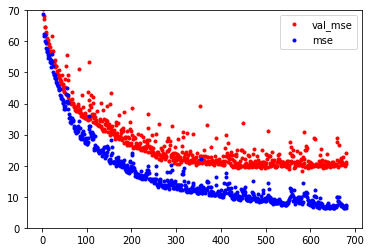

In [137]:
plt.plot(x_len, y_vmse, "o", c="red", markersize=3, label='val_mse')
plt.plot(x_len, y_mse, "o", c="blue", markersize=3, label='mse')

plt.legend()
plt.ylim(0, 70)  

plt.show()